# Homework #4: Analyze Historical and Future Changes of Global and Regional Surface Air Temperature (SAT) and Precipitation

**Assignment:**  
This homework will be completed **in class**. Each group will **present their results** in the next class.  

---

## Instructions for Group Work
1. Discuss together and define:  
   - The **scientific questions** you want to answer.  
   - The **analysis plan** for your group.  
2. Identify a **group leader** and assign contributions for each member.  
3. Conduct the analysis collaboratively and **combine your results**.  
4. Prepare a **shared presentation** (Google Slides or Microsoft Online Slides).  
5. Each member should be ready to **present their part of the work** during the group presentation.

---

## Data
We will use historical and future simulations from the **GFDL SPEAR model** ([link](https://www.gfdl.noaa.gov/spear_large_ensembles/)).

> **Note:** The data has been regridded to **2.5° × 2.5°** resolution to reduce storage size (see [MMLEA v2](https://www.cesm.ucar.edu/community-projects/mmlea/v2)).

- **Monthly Surface Air Temperature (tas):** 1921–2100  
  - [tas_Amon_GFDL-SPEAR-MED_historical_ssp585_192101-210012_ens1-30.nc](https://cometmail-my.sharepoint.com/:u:/g/personal/dal138778_utdallas_edu/Eagrk7DxmWtGpHKGWwNqnI4BJlFX7hHUzqmmt7HQT70wbA?e=tdJGFO)  

- **Monthly Precipitation (pr):** 1921–2100  
  - [pr_Amon_GFDL-SPEAR-MED_historical_ssp585_192101-210012_ens1-30.nc](https://cometmail-my.sharepoint.com/:u:/g/personal/dal138778_utdallas_edu/EYfaC2MKMKhCjgqlVpTVxH8BUErBaFOR4Upya3pEaICp-g?e=ALa0Ec)  

- **Observational data:** that you can make use of:
 
  - the datasets you have analyzed previously
## Suggested Questions / Analyses
1. **Model vs. Observations**  
   - Compare the **30-member ensemble simulations** with observations.  
2. **Ensemble Statistics**  
   - Compute and analyze the **ensemble mean** and **ensemble spread**.  
3. **Apply Previous Analyses**  
   - Use methods from previous homework: time series, trend analysis, potential density distribution, composite analysis, etc.  
4. **Spatial Analysis**  
   - Start with **global maps**, then select **regions of interest** for deeper analysis.  
5. **Temporal Changes**  
   - Compare **historical changes** (1921–2020) with **future projections** (2021–2100).  

---

## Deliverables
- A **group presentation** summarizing your analyses and results.  
- Each member should contribute and explain their part of the work.

In [1]:
# Import Python libraries for data analysis, plotting, and mapping
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from scipy.stats import linregress

from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [2]:
#print working directory; Equivalent to running pwd in a terminal.
! pwd

/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course


In [3]:
def area_weighted_mean(dataarray, lat_name='lat'):
    """
    Compute area-weighted mean of a DataArray.
    Assumes dataarray has a latitude dimension named 'lat' or specified by lat_name.
    """
    weights = np.cos(np.deg2rad(dataarray[lat_name]))
    weights.name = "weights"
    
    weighted_data = dataarray.weighted(weights)
    return weighted_data.mean(dim=[lat_name, 'lon'])

In [4]:
# Define and open a NetCDF dataset using xarray
ds_ts_spear = xr.open_dataset("/Users/xianwu/OneDrive - The University of Texas at Dallas/largedata_toshare/tas_Amon_GFDL-SPEAR-MED_historical_ssp585_192101-210012_ens1-30.nc", decode_times=False)

ds_pr_spear = xr.open_dataset("/Users/xianwu/OneDrive - The University of Texas at Dallas/largedata_toshare/pr_Amon_GFDL-SPEAR-MED_historical_ssp585_192101-210012_ens1-30.nc", decode_times=False)

# Assign this time range to the datasets
ds_ts_spear = ds_ts_spear.assign_coords(time=pd.date_range(start="1921-01", end="2100-12", freq="MS"))
ds_pr_spear = ds_pr_spear.assign_coords(time=pd.date_range(start="1921-01", end="2100-12", freq="MS"))

In [5]:
ds_ts_spear

<xarray.Dataset> Size: 5GB
Dimensions:          (ensemble_member: 30, time: 2160, bnds: 2, lat: 72,
                      lon: 144)
Coordinates:
  * lon              (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lat              (lat) float64 576B -88.75 -86.25 -83.75 ... 86.25 88.75
  * ensemble_member  (ensemble_member) int64 240B 1 2 3 4 5 6 ... 26 27 28 29 30
  * time             (time) datetime64[ns] 17kB 1921-01-01 ... 2100-12-01
Dimensions without coordinates: bnds
Data variables:
    time_bnds        (ensemble_member, time, bnds) float64 1MB ...
    tas              (ensemble_member, time, lat, lon) float64 5GB ...
Attributes: (12/30)
    CDI:                    Climate Data Interface version 2.0.2 (https://mpi...
    Conventions:            CF-1.7
    source:                 GFDL-SPEAR (2020, https://agupubs.onlinelibrary.w...
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                Mon Nov 21 18:26:02 2022: cdo -O -b F64 -remapcon...
    table_id:               Amon
    ...                     ...
    title:                  NOAA GFDL GFDL-SPEAR-MED, all-forcing simulation ...
    gfdl_experiment_name:   SPEAR-MED.historical.r1
    license:                CC-BY-SA-4.0
    forcing:                CMIP6 historical
    external_variables:     areacella
    CDO:                    Climate Data Operators version 2.0.1 (https://mpi...

In [6]:
# Extract the variable from the datasets
ts_spear = ds_ts_spear['tas'].sel(time=slice("1921-01-01", "2100-12-31"))
ts_spear = ts_spear-273.15
pr_spear = ds_pr_spear['pr'].sel(time=slice("1921-01-01", "2100-12-31"))

In [7]:
# Define and open a NetCDF dataset using xarray
ds_ts_obs = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.t2m.194001-202507.nc")
ds_pr_obs = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/merge-land-ocean-rainfall-obsdata-GPCC-JRA55-1958-2023.nc", decode_times=False)
ds_ts_obs = ds_ts_obs.rename({
    'valid_time': 'time',
    'latitude': 'lat',
    'longitude': 'lon'
})
# Assign this time range to the datasets
ds_ts_obs = ds_ts_obs.assign_coords(time=pd.date_range(start="1940-01", end="2025-07", freq="MS"))
ds_pr_obs = ds_pr_obs.assign_coords(time=pd.date_range(start="1958-01", end="2023-12", freq="MS"))

In [8]:
# Extract the variable from the datasets
ts_obs = ds_ts_obs['t2m'].sel(time=slice("1940-01-01", "2023-12-31"))
ts_obs = ts_obs - 273.15
pr_obs = ds_pr_obs['rain'].sel(time=slice("1958-01-01", "2023-12-31"))

In [9]:
ts_spear_global_avg = area_weighted_mean(ts_spear)
ts_spear_global_avg

<xarray.DataArray 'tas' (ensemble_member: 30, time: 2160)> Size: 518kB
array([[10.85658061, 10.88519566, 11.87899161, ..., 17.93586269,
        16.77397785, 16.20826091],
       [10.71801581, 11.04092592, 11.87535423, ..., 17.94588469,
        17.04366009, 16.38214698],
       [10.30642444, 10.8488576 , 11.55442709, ..., 17.83061505,
        16.83335819, 16.03942844],
       ...,
       [10.76353061, 11.15649338, 11.85668731, ..., 17.89564966,
        16.93555403, 16.26241692],
       [10.94605969, 11.26748165, 11.92080427, ..., 17.75818399,
        16.77543221, 16.22633845],
       [10.8006025 , 11.25097325, 11.85592328, ..., 17.99630474,
        16.95964333, 16.41931305]], shape=(30, 2160))
Coordinates:
  * ensemble_member  (ensemble_member) int64 240B 1 2 3 4 5 6 ... 26 27 28 29 30
  * time             (time) datetime64[ns] 17kB 1921-01-01 ... 2100-12-01

In [10]:
ts_obs_global_avg = area_weighted_mean(ts_obs)
ts_obs_global_avg

<xarray.DataArray 't2m' (time: 1008)> Size: 8kB
array([11.49666461, 11.87216571, 12.52400178, ..., 15.29617846,
       14.2242387 , 13.5102719 ], shape=(1008,))
Coordinates:
    number   int64 8B 0
    expver   (time) <U4 16kB '0001' '0001' '0001' ... '0001' '0001' '0001'
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01

In [11]:
ts_spear_global_avg_ann = ts_spear_global_avg.groupby('time.year').mean('time')
ts_spear_global_avg_ann_ensmean = ts_spear_global_avg_ann.mean('ensemble_member')

In [12]:
ts_obs_global_avg_ann = ts_obs_global_avg.groupby('time.year').mean('time')

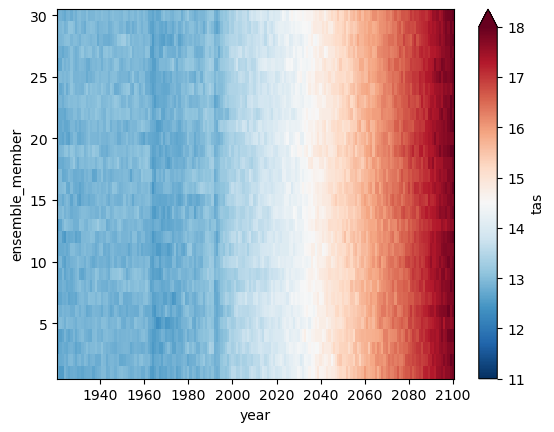

In [13]:
ts_spear_global_avg_ann.plot(vmin=11,vmax=18,cmap='RdBu_r')

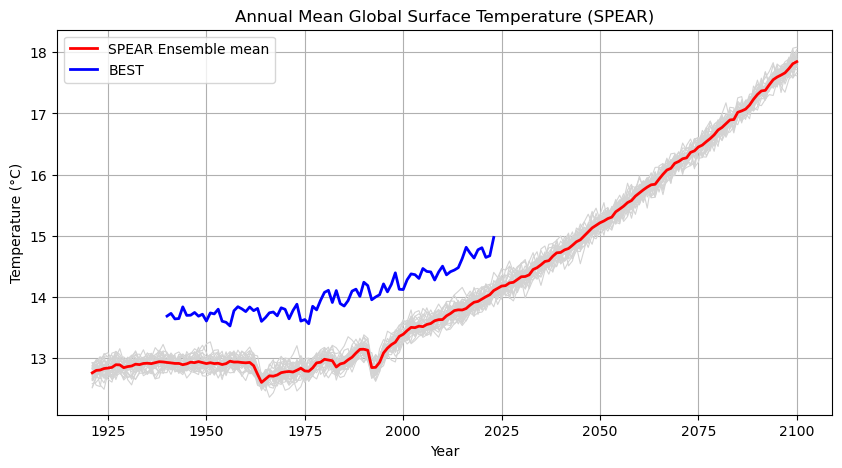

In [14]:
plt.figure(figsize=(10, 5))

# Plot all ensemble members in light gray
for i in range(ts_spear_global_avg_ann.ensemble_member.size):
    plt.plot(ts_spear_global_avg_ann['year'], 
             ts_spear_global_avg_ann.isel(ensemble_member=i), 
             color='lightgray', linewidth=0.8)

# Plot ensemble mean in bold red
plt.plot(ts_spear_global_avg_ann_ensmean['year'], 
         ts_spear_global_avg_ann_ensmean, 
         color='r', linewidth=2, label='SPEAR Ensemble mean')

# Plot ensemble mean in bold red
plt.plot(ts_obs_global_avg_ann['year'], 
         ts_obs_global_avg_ann, 
         color='b', linewidth=2, label='BEST')

plt.title('Annual Mean Global Surface Temperature (SPEAR)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

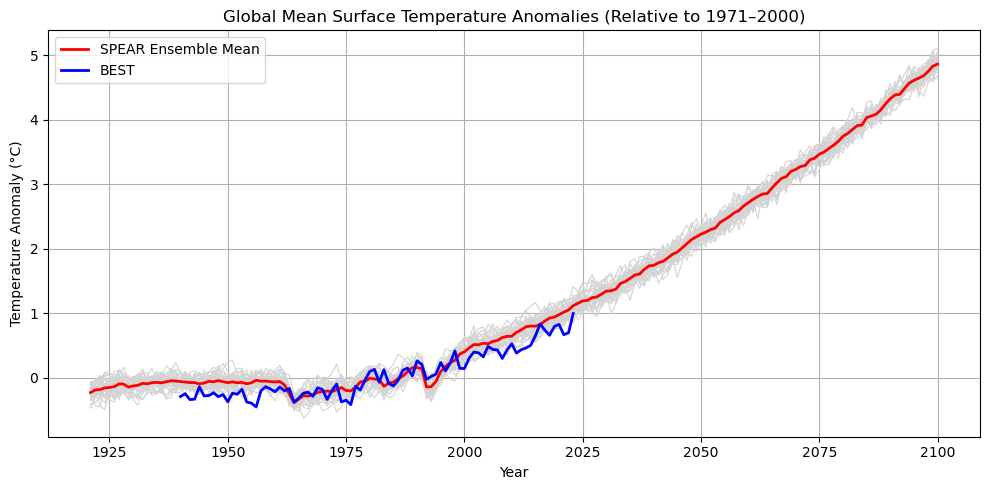

In [15]:
import matplotlib.pyplot as plt

# --- Compute 1971–2000 climatology for each dataset ---
spear_clim = ts_spear_global_avg_ann_ensmean.sel(year=slice(1971, 2000)).mean()
obs_clim = ts_obs_global_avg_ann.sel(year=slice(1971, 2000)).mean()

# --- Convert to anomalies ---
ts_spear_global_avg_ann_anom = ts_spear_global_avg_ann - spear_clim
ts_spear_global_avg_ann_ensmean_anom = ts_spear_global_avg_ann_ensmean - spear_clim
ts_obs_global_avg_ann_anom = ts_obs_global_avg_ann - obs_clim

# --- Plot ---
plt.figure(figsize=(10, 5))

# Plot all ensemble members in light gray
for i in range(ts_spear_global_avg_ann_anom.ensemble_member.size):
    plt.plot(ts_spear_global_avg_ann_anom['year'], 
             ts_spear_global_avg_ann_anom.isel(ensemble_member=i), 
             color='lightgray', linewidth=0.8)

# Plot ensemble mean in bold red
plt.plot(ts_spear_global_avg_ann_ensmean_anom['year'], 
         ts_spear_global_avg_ann_ensmean_anom, 
         color='r', linewidth=2, label='SPEAR Ensemble Mean')

# Plot BEST in blue
plt.plot(ts_obs_global_avg_ann_anom['year'], 
         ts_obs_global_avg_ann_anom, 
         color='b', linewidth=2, label='BEST')

# --- Formatting ---
plt.title('Global Mean Surface Temperature Anomalies (Relative to 1971–2000)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
